In [ ]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [66]:
import pandas as pd
df = pd.read_csv('data/gunshot.csv')
df['Poverty rate'] = df['Poverty rate'].str.rstrip('%').astype('float') / 100.0
df['Permit required to carry handgun'] = df['Permit required to carry handgun'].replace('No',-1).replace('Yes',1).replace('FOID',0)
df.insert(loc=0, column='code', value=[us_state_abbrev[i] for i in df['State']])
df

,code,State,"Firearm deaths per 100,000 people",Poverty rate,Permit required to carry handgun,Violent crime rate,Total firearm deaths 2016
0,MS,Mississippi,19.8,0.208,-1,280.5,587
1,OK,Oklahoma,19.6,0.163,1,449.8,766
2,DE,Delaware,10.9,0.117,1,508.8,111
3,MN,Minnesota,7.6,0.099,1,242.6,432
4,AK,Alaska,23.0,0.099,-1,804.2,177
5,IL,Illinois,11.6,0.130,0,436.3,1490
6,AR,Arkansas,17.7,0.172,1,550.9,541
7,NM,New Mexico,18.2,0.198,1,702.5,383
8,OH,Ohio,12.9,0.146,1,300.3,1524
9,IN,Indiana,14.9,0.141,1,404.7,997


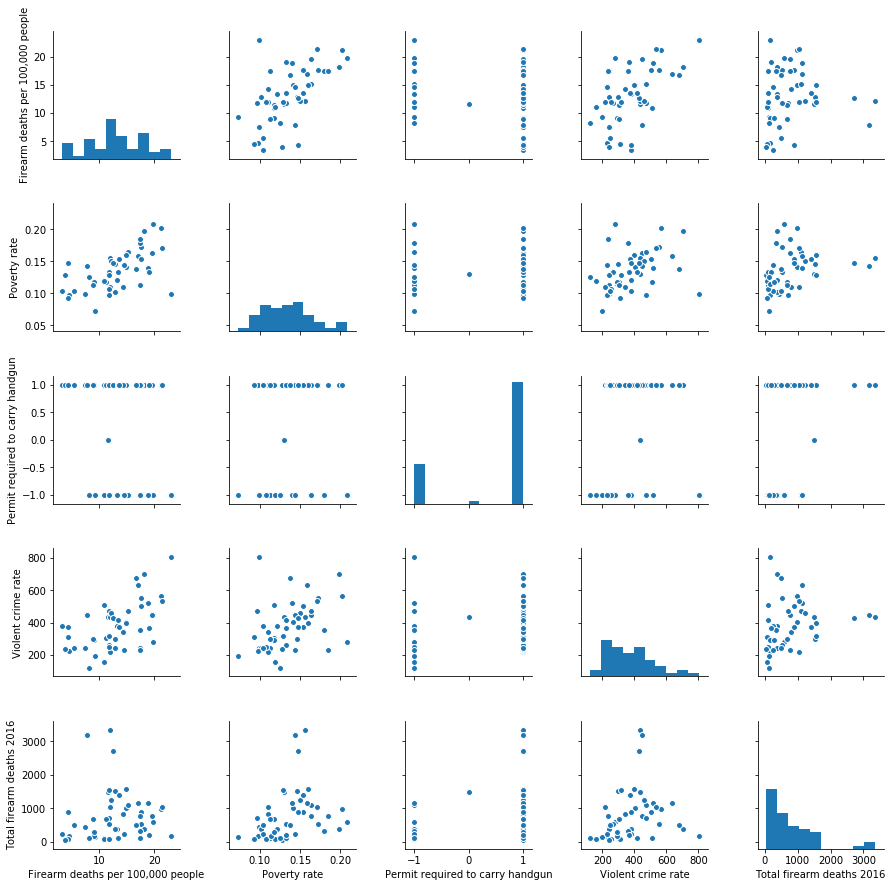

In [56]:
import seaborn as sns
g = sns.pairplot(df)

In [75]:
import plotly
import plotly.plotly as py
import pandas as pd
# plotly.tools.set_credentials_file(username='shl666', api_key='63b9Xz7eRm7yqi5GrSK2')
def mapPlot(df, item):
    for col in df.columns:
        df[col] = df[col].astype(str)

    scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
                [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]


    data = [ dict(
            type='choropleth',
            colorscale = scl,
            autocolorscale = False,
            locations = df['code'],
            z = df[item].astype(float),
            locationmode = 'USA-states',
            marker = dict(
                line = dict (
                    color = 'rgb(255,255,255)',
                    width = 2
                ) )
            ) ]

    layout = dict(
            title = '2016 US {}'.format(item),
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' ),
                showlakes = True,
                lakecolor = 'rgb(255, 255, 255)'),
                 )

    fig = dict( data=data, layout=layout )
    res = py.iplot( fig, filename='d3-cloropleth-map' )
    return res

In [76]:
res = mapPlot(df, 'Poverty rate')
res

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~shl666/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'
